In [136]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import xgboost
from sklearn.metrics import r2_score

In [64]:
# Load the dataset 

cars_new= pd.read_csv("final data.csv")

In [65]:
# Look at the first 5 rows

cars_new.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,3192.88,10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,22806.30,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,8210.27,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10947.02,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,32366.70,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Look at the last 5 rows

cars_new.tail()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
6014,27365,28.40,1248.0,74.0,5.0,8666.39,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6015,100000,24.40,1120.0,71.0,5.0,7298.02,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6016,55000,14.00,2498.0,112.0,8.0,5291.06,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6017,46000,18.90,998.0,67.1,5.0,4834.94,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6018,47000,25.44,936.0,57.6,5.0,4561.26,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building 


In [67]:
cars_new.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'No_of_Years', 'CNG', 'Diesel', 'Electric',
       ...
       'Volkswagen CrossPolo', 'Volkswagen Jetta', 'Volkswagen Passat',
       'Volkswagen Polo', 'Volkswagen Tiguan', 'Volkswagen Vento', 'Volvo S60',
       'Volvo S80', 'Volvo V40', 'Volvo XC60'],
      dtype='object', length=232)

In [68]:
X = cars_new.drop('Price',axis=1)
Y = cars_new['Price']


In [69]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y.head()

0     3192.88
1    22806.30
2     8210.27
3    10947.02
4    32366.70
Name: Price, dtype: float64

# Splitting the data with a test size of 0.2

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [72]:
minma = MinMaxScaler()
minma.fit(X_train)
X_train = minma.transform(X_train)
X_test = minma.transform(X_test)

In [73]:
X_train

array([[0.00368964, 0.67203339, 0.15960306, ..., 0.        , 0.        ,
        0.        ],
       [0.00535845, 0.51311866, 0.17965681, ..., 0.        , 0.        ,
        0.        ],
       [0.01412791, 0.48002385, 0.16146372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0095124 , 0.35927251, 0.32148026, ..., 0.        , 0.        ,
        0.        ],
       [0.0076662 , 0.65593321, 0.19805665, ..., 0.        , 0.        ,
        0.        ],
       [0.01274326, 0.69767442, 0.12900558, ..., 0.        , 0.        ,
        0.        ]])

In [74]:
y_train

3509    16748.95
3332     6367.52
5383     2006.95
1891     6841.89
5757    30925.34
          ...   
4931    11494.38
3264     9031.29
1653    11403.15
2607    20981.80
2732     7845.37
Name: Price, Length: 4815, dtype: float64

In [75]:
X_test

array([[0.0095124 , 0.45020871, 0.32148026, ..., 0.        , 0.        ,
        0.        ],
       [0.01328389, 0.5307096 , 0.12900558, ..., 0.        , 0.        ,
        0.        ],
       [0.01031243, 0.4484198 , 0.20136448, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0048969 , 0.44722719, 0.12900558, ..., 0.        , 0.        ,
        0.        ],
       [0.00832114, 0.51878354, 0.18048377, ..., 0.        , 0.        ,
        0.        ],
       [0.00770159, 0.56350626, 0.07732065, ..., 0.        , 0.        ,
        0.        ]])

In [76]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

# Linear Regression Model 

In [77]:
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [78]:
print("Accuracy for Test set: "+"{:.2f}".format(reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(reg.score(X_train,y_train)))

Accuracy for Test set: -50376581375905767424.00
Accuracy for Training set: 0.86


In [79]:
math.sqrt(mean_squared_error(y_test,test_pred))

141785128332229.9

In [80]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 24.6
Tree on test set MAE%: 46026261912.8


In [81]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [82]:
test_pred

array([17751.87675993,  6578.20949494,  5784.16139487, ...,
       17233.70502748, 13339.74556781, 12285.09381914])

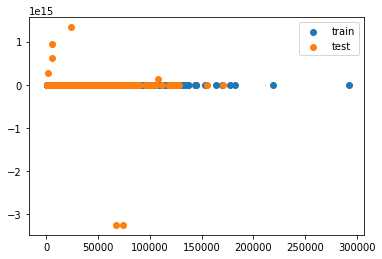

In [83]:
# Create a scatter plot with train and test

plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# K-Neighbors Regression Model

In [84]:
k_reg=KNeighborsRegressor()
k_reg = k_reg.fit(X_train,y_train)
train_pred = k_reg.predict(X_train)
test_pred=k_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(k_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(k_reg.score(X_train,y_train)))

Accuracy for Test set: 0.87
Accuracy for Training set: 0.91


In [85]:
math.sqrt(mean_squared_error(y_test,test_pred))

7295.2654144263915

In [86]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 14.9
Tree on test set MAE%: 18.7


In [87]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [88]:
test_pred

array([15387.868,  6294.538,  6104.792, ..., 13410.106, 10731.732,
        7006.094])

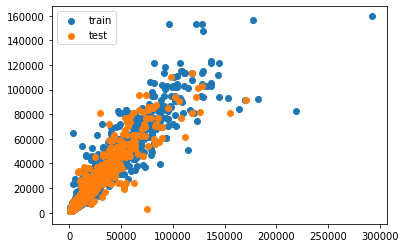

In [89]:
# Create a scatter plot with train and test 

plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# Decision Tree Regression Model

In [90]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train,y_train)
train_pred = dec_reg.predict(X_train)
test_pred=dec_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(dec_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(dec_reg.score(X_train,y_train)))

Accuracy for Test set: 0.84
Accuracy for Training set: 1.00


In [91]:
math.sqrt(mean_squared_error(y_test,test_pred))

7869.86161758352

In [92]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 20.4


In [93]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [94]:
test_pred

array([14176.4  ,  6294.54 ,  6933.12 , ..., 15052.16 , 10627.735,
        7845.37 ])

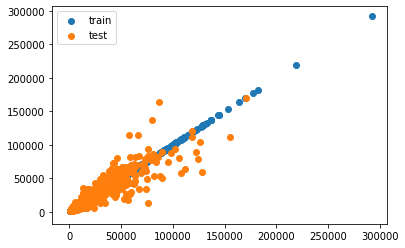

In [95]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# Random Forest Model

In [96]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train,y_train)
train_pred = rf_reg.predict(X_train)
test_pred=rf_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(rf_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(rf_reg.score(X_train,y_train)))

Accuracy for Test set: 0.92
Accuracy for Training set: 0.99


In [97]:
from sklearn.model_selection import cross_val_score, cross_val_predict
acc = cross_val_score(RandomForestRegressor(n_estimators=200),X,Y,cv=6)

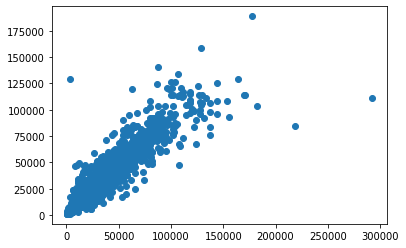

In [98]:
predictions = cross_val_predict(RandomForestRegressor(n_estimators=200),X,Y,cv=6)
plt.scatter(Y, predictions)

In [99]:
np.average(acc)

0.8931717174931809

In [100]:
from sklearn import metrics
accuracy = metrics.r2_score(Y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)


Cross-Predicted Accuracy: 0.8935595094676718


In [101]:
math.sqrt(mean_squared_error(y_test,test_pred))

5778.689652214539

In [102]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 6.0
Tree on test set MAE%: 15.8


In [103]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [104]:
test_pred

array([14420.882025  ,  5926.1714    ,  7305.13345   , ...,
       14282.21805   , 10514.22631512,  6884.12675   ])

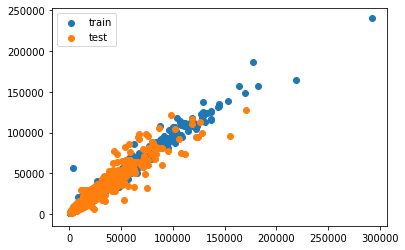

In [105]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

#  Gradient Boosted Regression Model 

In [106]:
gb_reg = GradientBoostingRegressor(max_features=5,
                                learning_rate=0.01,
                                n_estimators=200,
                                random_state=99)
gb_reg.fit(X_train,y_train)
train_pred = gb_reg.predict(X_train)
test_pred=gb_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(gb_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(gb_reg.score(X_train,y_train)))

Accuracy for Test set: 0.38
Accuracy for Training set: 0.38


In [107]:
math.sqrt(mean_squared_error(y_test,test_pred))

15675.958106964998

In [108]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 55.7
Tree on test set MAE%: 54.4


In [109]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [110]:
test_pred

array([16957.14505282, 13278.78612378, 13147.91290171, ...,
       15939.59320993, 13671.87287961, 14182.36209387])

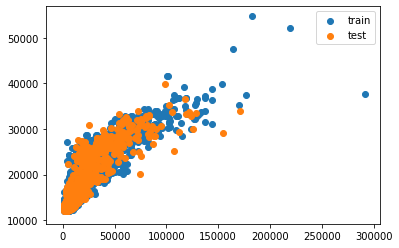

In [111]:
# Create a scatter plot with train and test
plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# Ridge Regression Model

In [112]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)
train_pred = clf.predict(X_train)
test_pred=clf.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(clf.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(clf.score(X_train,y_train)))

Accuracy for Test set: 0.83
Accuracy for Training set: 0.84


In [113]:
math.sqrt(mean_squared_error(y_test,test_pred))

8250.511003902315

In [114]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 26.1
Tree on test set MAE%: 26.1


In [115]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [116]:
test_pred

array([17801.92300731,  8440.1940262 ,  5613.61653214, ...,
       17357.98601701, 13338.76955837, 12084.83524673])

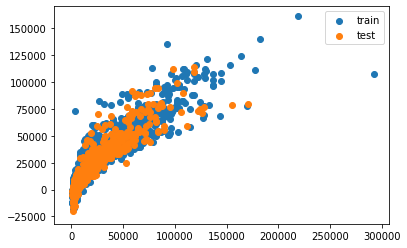

In [117]:
# Create a scatter plot with train and test 
plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# Lasso Regression Model

In [118]:
las = linear_model.Lasso(alpha=1)
las.fit(X_train,y_train)
train_pred = las.predict(X_train)
test_pred=las.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(las.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(las.score(X_train,y_train)))

Accuracy for Test set: 0.82
Accuracy for Training set: 0.85


In [119]:
math.sqrt(mean_squared_error(y_test,test_pred))

8441.845637898112

In [120]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 24.8
Tree on test set MAE%: 25.9


In [121]:
y_test

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [122]:
test_pred

array([17802.70841286,  7642.15709468,  5709.04965629, ...,
       17851.23156488, 13312.02034515, 12069.22566329])

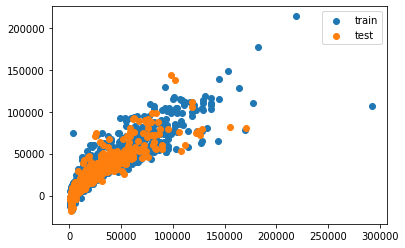

In [123]:
# Create a scatter plot with train and test
plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()

# Artificial Neural Network ( Keras )

In [124]:
np.random.seed(1337)

In [125]:
model = Sequential()
model.add(Dense(200,activation='relu',input_dim=231))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               46400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 66,601
Trainable params: 66,601
Non-trainable params: 0
_________________________________________________________________


In [127]:

model.compile(optimizer ='adam', loss='mse')

In [128]:

model.fit(X_train, y_train, epochs=400,batch_size=8,shuffle=False)

Epoch 1/400
4815/4815 [==============================] - 1s 255us/step - loss: 548464613.2494
Epoch 2/400
4815/4815 [==============================] - 1s 206us/step - loss: 315227089.8318
Epoch 3/400
4815/4815 [==============================] - 1s 176us/step - loss: 255597764.7576
Epoch 4/400
4815/4815 [==============================] - 1s 166us/step - loss: 212115483.8895
Epoch 5/400
4815/4815 [==============================] - 1s 197us/step - loss: 183937554.7556
Epoch 6/400
4815/4815 [==============================] - 1s 242us/step - loss: 169771030.7431
Epoch 7/400
4815/4815 [==============================] - ETA: 0s - loss: 158958823.130 - 1s 190us/step - loss: 156994750.0997
Epoch 8/400
4815/4815 [==============================] - 1s 214us/step - loss: 142294624.0174
Epoch 9/400
4815/4815 [==============================] - 1s 182us/step - loss: 130957159.8982
Epoch 10/400
4815/4815 [==============================] - 1s 170us/step - loss: 119392239.1402
Epoch 11/400
4815/4815 [===

4815/4815 [==============================] - 1s 177us/step - loss: 30927416.9291
Epoch 88/400
4815/4815 [==============================] - 1s 163us/step - loss: 34750971.6164
Epoch 89/400
4815/4815 [==============================] - 1s 177us/step - loss: 34718456.3708
Epoch 90/400
4815/4815 [==============================] - 1s 177us/step - loss: 31245564.6032
Epoch 91/400
4815/4815 [==============================] - 1s 164us/step - loss: 33488534.4645
Epoch 92/400
4815/4815 [==============================] - 1s 177us/step - loss: 35711899.1972
Epoch 93/400
4815/4815 [==============================] - 1s 177us/step - loss: 33431582.1208
Epoch 94/400
4815/4815 [==============================] - 1s 167us/step - loss: 33497113.8254
Epoch 95/400
4815/4815 [==============================] - 1s 164us/step - loss: 33685146.9335
Epoch 96/400
4815/4815 [==============================] - 1s 189us/step - loss: 33071418.5610
Epoch 97/400
4815/4815 [==============================] - 1s 190us/step -

4815/4815 [==============================] - 1s 166us/step - loss: 27690973.6312
Epoch 174/400
4815/4815 [==============================] - 1s 200us/step - loss: 30729104.5952
Epoch 175/400
4815/4815 [==============================] - 1s 187us/step - loss: 32081132.9168
Epoch 176/400
4815/4815 [==============================] - 1s 166us/step - loss: 31317768.5090
Epoch 177/400
4815/4815 [==============================] - 1s 164us/step - loss: 30246362.0024
Epoch 178/400
4815/4815 [==============================] - 1s 166us/step - loss: 28396791.5539
Epoch 179/400
4815/4815 [==============================] - 1s 163us/step - loss: 31423299.1653
Epoch 180/400
4815/4815 [==============================] - 1s 167us/step - loss: 30113268.0467
Epoch 181/400
4815/4815 [==============================] - 1s 163us/step - loss: 29352794.0914
Epoch 182/400
4815/4815 [==============================] - 1s 166us/step - loss: 30231268.6697
Epoch 183/400
4815/4815 [==============================] - 1s 16

4815/4815 [==============================] - 1s 168us/step - loss: 28775063.7508
Epoch 260/400
4815/4815 [==============================] - 1s 164us/step - loss: 29424976.9841
Epoch 261/400
4815/4815 [==============================] - 1s 167us/step - loss: 30123116.6325
Epoch 262/400
4815/4815 [==============================] - 1s 165us/step - loss: 28353498.9817
Epoch 263/400
4815/4815 [==============================] - 1s 165us/step - loss: 30287965.0006
Epoch 264/400
4815/4815 [==============================] - 1s 166us/step - loss: 30726382.5330
Epoch 265/400
4815/4815 [==============================] - 1s 167us/step - loss: 29491250.5054
Epoch 266/400
4815/4815 [==============================] - 1s 164us/step - loss: 29336794.9050
Epoch 267/400
4815/4815 [==============================] - 1s 166us/step - loss: 29086798.9420
Epoch 268/400
4815/4815 [==============================] - 1s 165us/step - loss: 28720079.6421
Epoch 269/400
4815/4815 [==============================] - 1s 16

4815/4815 [==============================] - 1s 167us/step - loss: 28797150.5563
Epoch 346/400
4815/4815 [==============================] - 1s 166us/step - loss: 26659772.2444
Epoch 347/400
4815/4815 [==============================] - 1s 166us/step - loss: 27442149.9109
Epoch 348/400
4815/4815 [==============================] - 1s 206us/step - loss: 28573155.9476
Epoch 349/400
4815/4815 [==============================] - 1s 170us/step - loss: 27297328.4431
Epoch 350/400
4815/4815 [==============================] - 1s 166us/step - loss: 28985779.4367
Epoch 351/400
4815/4815 [==============================] - 1s 167us/step - loss: 28296758.1835
Epoch 352/400
4815/4815 [==============================] - 1s 167us/step - loss: 28457527.3736
Epoch 353/400
4815/4815 [==============================] - 1s 180us/step - loss: 28129005.9798
Epoch 354/400
4815/4815 [==============================] - 1s 178us/step - loss: 28236987.9499
Epoch 355/400
4815/4815 [==============================] - 1s 18

In [129]:
test_pred = model.predict(X_test)
train_pred= model.predict(X_train)

In [130]:
y_test 

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
5899     9104.27
4139    69604.83
728     15508.28
3619    11403.15
3828     7060.83
Name: Price, Length: 1204, dtype: float64

In [131]:
test_pred

array([[16496.94  ],
       [ 6623.0625],
       [ 6683.342 ],
       ...,
       [15008.195 ],
       [10600.633 ],
       [ 6025.574 ]], dtype=float32)

In [132]:
test_u =test_pred.flatten()
test_u

array([16496.94  ,  6623.0625,  6683.342 , ..., 15008.195 , 10600.633 ,
        6025.574 ], dtype=float32)

In [133]:
train_u = train_pred.flatten()

In [134]:
MAE_train=np.mean(abs(y_train-train_u))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_u))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 11.9
Tree on test set MAE%: 15.4


In [137]:
print("Accuracy for Test set: "+"{:.2f}".format(r2_score(y_test,test_u)))
print("Accuracy for Training set:"+"{:.2f}".format(r2_score(y_train,train_u)))

Accuracy for Test set: 0.91
Accuracy for Training set:0.95


In [138]:
train_pred

array([[12883.298 ],
       [ 6567.916 ],
       [ 1971.5538],
       ...,
       [11022.27  ],
       [16329.557 ],
       [ 7533.397 ]], dtype=float32)

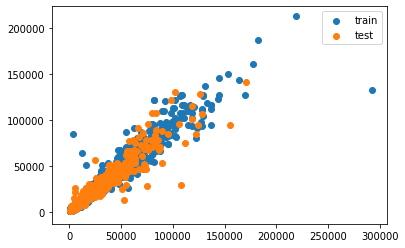

In [139]:
# Create a scatter plot with train and test

plt.scatter(y_train, train_u, label='train')
plt.scatter(y_test, test_u, label='test')
plt.legend()
plt.show()

# XGBoost Regressor Model with K=5

In [152]:
# Parameter Tuning 
base_score=[0.25,0.5,0.75,1]
booster=['gbtree','gblinear']
n_estimators = [100, 500, 700, 1000, 1500]
max_depth = [1,2, 3, 5, 9]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5]

# Define the grid of hyperparameters to search
parameter_grid = {
    'base_score':base_score,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [153]:
regressor=xgboost.XGBRegressor()
ran = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=40)

In [154]:
ran.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 10.1min finished
C:\Users\amith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:23:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [155]:
ran.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [156]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [157]:
regressor.fit(X_train,y_train)

[00:31:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [158]:
train_pred = regressor.predict(X_train)
test_pred=regressor.predict(X_test)

In [159]:
y_test.head()

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
Name: Price, dtype: float64

In [160]:
print("Accuracy for Test set: "+"{:.2f}".format(regressor.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(regressor.score(X_train,y_train)))

Accuracy for Test set: 0.89
Accuracy for Training set: 0.99


In [161]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 8.6
Tree on test set MAE%: 15.8


In [162]:
math.sqrt(mean_squared_error(y_test,test_pred))

6580.266037157765

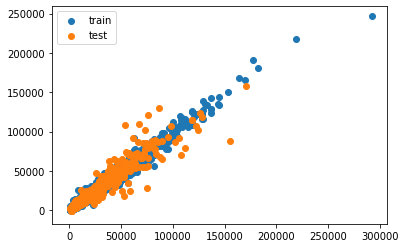

In [151]:
# Create a scatter plot with train and test

plt.scatter(y_train, train_pred, label='train')
plt.scatter(y_test, test_pred, label='test')
plt.legend()
plt.show()